# Finding trends in cryptocurrency

### Pulling data from coinmarket API

In [1]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6aac059d-ecbc-41f8-840f-9f4e0e652e66',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-03-10T18:51:48.982Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9062}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10087, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10087,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931356e+07,1.931356e+07,...,41.4019,4.186430e+11,NaN,2023-03-10T18:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 18:51:53.175593
1,1027,Ethereum,ETH,ethereum,6565,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,18.5441,1.724507e+11,NaN,2023-03-10T18:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 18:51:53.175593
2,825,Tether,USDT,tether,49095,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.176081e+10,7.314177e+10,...,7.7167,7.314389e+10,NaN,2023-03-10T18:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-10 18:51:53.175593
3,3408,USD Coin,USDC,usd-coin,10526,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.355399e+10,4.355399e+10,...,4.6833,4.355283e+10,NaN,2023-03-10T18:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-10 18:51:53.175593
4,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578931e+08,1.599800e+08,...,4.6794,4.409158e+10,NaN,2023-03-10T18:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 18:51:53.175593
5,52,XRP,XRP,xrp,902,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,2.0047,3.659094e+10,NaN,2023-03-10T18:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 18:51:53.175593
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469226e+10,3.555603e+10,...,1.1573,1.395971e+10,NaN,2023-03-10T18:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 18:51:53.175593
7,3890,Polygon,MATIC,polygon,607,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.9732,1.036227e+10,NaN,2023-03-10T18:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 18:51:53.175593
8,74,Dogecoin,DOGE,dogecoin,655,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.9276,8.626016e+09,NaN,2023-03-10T18:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 18:51:53.175593
9,4687,Binance USD,BUSD,binance-usd,6400,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8.397378e+09,8.397378e+09,...,0.9032,8.399178e+09,NaN,2023-03-10T18:49:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-10 18:51:53.175593


In [77]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


### Exporting the data in the excel sheet

In [78]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_41116\2337093925.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_41116\2337093925.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_41116\2337093925.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_41116\2337093925.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_41116\2337093925.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

### Data cleaning and transformation

In [151]:
df.shape

(90, 36)

In [152]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [153]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10087,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19313625.0,19313625.0,...,41.6,421459093973.1,None,2023-03-10T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 21:59:40.971872
1,1027,Ethereum,ETH,ethereum,6565,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.2,122373866.2,...,18.7,173957736212.0,None,2023-03-10T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 21:59:40.971872
2,825,Tether,USDT,tether,49100,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71760806524.6,73141766321.2,...,7.7,73221196009.0,None,2023-03-10T21:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-10 21:59:40.971872
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157893106.4,159979963.6,...,4.7,44309314014.7,None,2023-03-10T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 21:59:40.971872
4,3408,USD Coin,USDC,usd-coin,10529,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43351932258.0,43351932258.0,...,4.7,43365938269.9,None,2023-03-10T21:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-10 21:59:40.971872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,5426,Solana,SOL,solana,439,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,383077955.5,539312704.9,...,0.7,9793197787.2,None,2023-03-10T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 22:57:07.409216
11,6636,Polkadot,DOT,polkadot-new,479,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1172055626.0,1291379489.4,...,0.7,7165732986.8,None,2023-03-10T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 22:57:07.409216
12,5994,Shiba Inu,SHIB,shiba-inu,493,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,549063278876301.9,589735030408322.8,...,0.6,6040300821.0,None,2023-03-10T22:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-03-10 22:57:07.409216
13,4943,Dai,DAI,multi-collateral-dai,1955,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5245637299.6,5245637299.6,...,0.6,5245445269.2,None,2023-03-10T22:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-03-10 22:57:07.409216


In [154]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'platform',
       'cmc_rank', 'self_reported_circulating_supply',
       'self_reported_market_cap', 'tvl_ratio', 'last_updated',
       'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 14
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  90 non-null     int64         
 1   name                                90 non-null     object        
 2   symbol                              90 non-null     object        
 3   slug                                90 non-null     object        
 4   num_market_pairs                    90 non-null     int64         
 5   date_added                          90 non-null     object        
 6   tags                                90 non-null     object        
 7   max_supply                          25 non-null     float64       
 8   circulating_supply                  90 non-null     float64       
 9   total_supply                        90 non-null     float64       
 10  platform                    

In [156]:
df.describe()

,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,...,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,platform.id
count,90.0,90.0,25.0,90.0,90.0,0.0,90.0,12.0,12.0,90.0,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,29.0
mean,2796.4,6043.6,37208400000.0,36634058274398.0,39349030163464.7,NaN,8.0,36282264521.0,4551736884.3,1457.0,...,0.7,0.9,-7.1,-13.4,5.7,3.9,53789395336.6,5.7,57968529484.3,1195.0
std,2236.3,12089.3,39863508761.1,137719722148776.1,147920930453526.6,NaN,4.3,36950483704.1,482010752.1,5026.4,...,0.9,2.3,5.7,9.3,9.5,13.7,99775356988.4,10.7,106928702408.0,334.7
min,1.0,439.0,21000000.0,19313625.0,19313625.0,NaN,1.0,904869778.0,4075200693.7,0.0,...,-0.3,-6.4,-20.4,-27.8,-13.7,-32.6,5167992923.4,0.6,5192126637.9,1027.0
25%,825.0,607.0,84000000.0,383077955.5,539312704.9,NaN,4.0,904869778.0,4092384035.9,0.3,...,0.0,-0.6,-9.9,-20.2,0.0,-0.1,6503638971.4,0.7,7165757143.4,1027.0
50%,2010.0,902.0,10000000000.0,8734317475.3,10000000000.0,NaN,8.0,36282264521.0,4539016859.2,1.0,...,0.6,0.1,-8.2,-14.9,4.5,0.8,9284825291.0,1.0,10630281435.5,1027.0
75%,4879.0,6565.0,45000000000.0,71760806524.6,91299698518.5,NaN,12.0,71659659264.0,5019800914.2,18.1,...,0.9,2.5,-0.4,-1.9,12.7,12.1,43702810450.5,4.7,44280429255.3,1027.0
max,6636.0,49103.0,100000000000.0,549063278876301.9,589735030408322.8,NaN,15.0,71659659264.0,5021097751.9,20148.2,...,3.2,5.7,0.3,0.3,25.9,33.5,389136467735.0,41.6,423112129995.2,1839.0


In [157]:
df.shape

(90, 36)

In [216]:
total_records = Crypto_trends.pivot_table(index = ['name'], aggfunc ='size')
total_records


name
BNB            1
Binance USD    1
Bitcoin        1
Cardano        1
Dai            1
Dogecoin       1
Ethereum       1
Litecoin       1
Polkadot       1
Polygon        1
Shiba Inu      1
Solana         1
TRON           1
Tether         1
USD Coin       1
XRP            1
dtype: int64

In [217]:
df.isnull().sum()

id                                     0
name                                   0
symbol                                 0
slug                                   0
num_market_pairs                       0
date_added                             0
tags                                   0
max_supply                            65
circulating_supply                     0
total_supply                           0
platform                              90
cmc_rank                               0
self_reported_circulating_supply      78
self_reported_market_cap              78
tvl_ratio                             90
last_updated                           0
quote.USD.price                        0
quote.USD.volume_24h                   0
quote.USD.volume_change_24h            0
quote.USD.percent_change_1h            0
quote.USD.percent_change_24h           0
quote.USD.percent_change_7d            0
quote.USD.percent_change_30d           0
quote.USD.percent_change_60d           0
quote.USD.percen

In [218]:
[null_features for null_features in df.columns if df[null_features].isnull().sum()>0]

['max_supply',
 'platform',
 'self_reported_circulating_supply',
 'self_reported_market_cap',
 'tvl_ratio',
 'quote.USD.tvl',
 'platform.id',
 'platform.name',
 'platform.symbol',
 'platform.slug',
 'platform.token_address']

<AxesSubplot:>

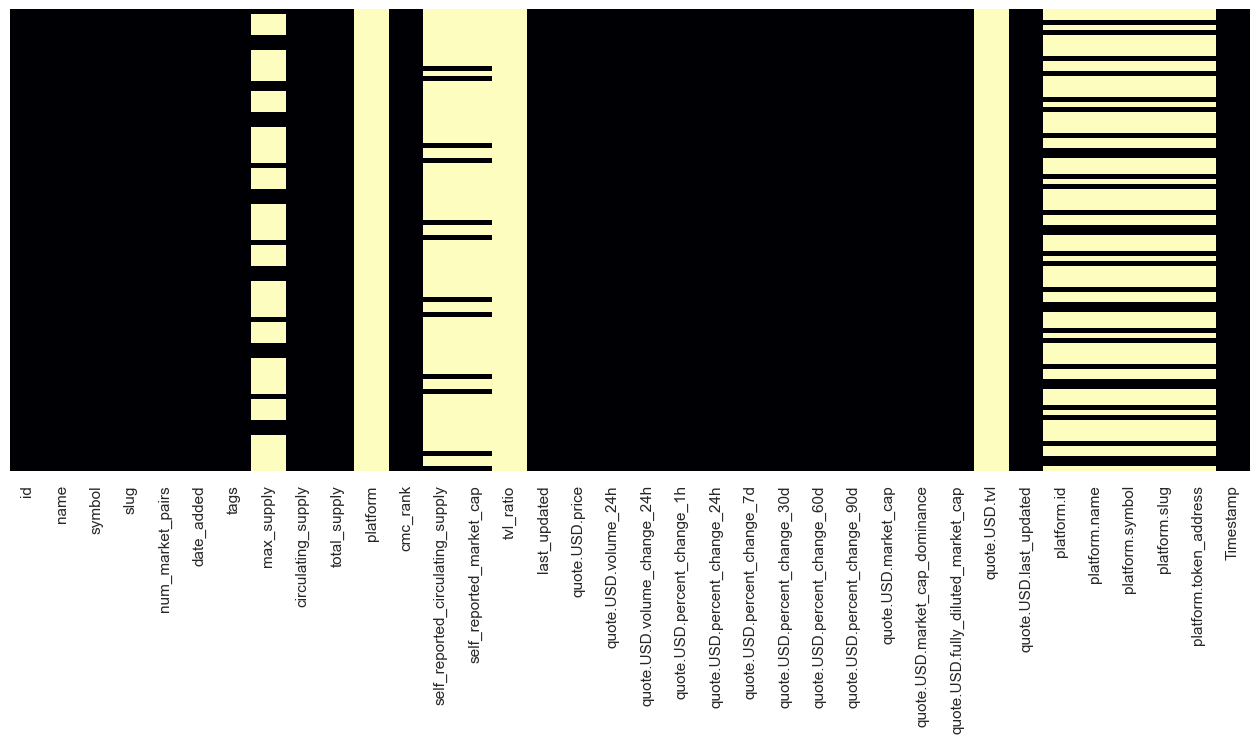

In [220]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma') # Heatmap to show the concentration of null values within the columns

## Comparing trading within 1hr

In [182]:
cat =['name','quote.USD.volume_24h']
trade = df[cat]
trade= trade.rename(columns={'name':'Crypto','quote.USD.volume_24h':'volume'})
trade

,Crypto,volume
0,Bitcoin,39139465444.0
1,Ethereum,12438281383.6
2,Tether,53733198899.3
3,BNB,573204167.0
4,USD Coin,6448397401.2
...,...,...
10,Solana,938027379.5
11,Polkadot,370388019.7
12,Shiba Inu,391938969.8
13,Dai,571910528.0


In [183]:
type(trade)

pandas.core.frame.DataFrame

In [192]:
trade = trade.groupby('Crypto').max().reset_index() # to convert grouped dataframe to data frame used resert_index()

In [193]:
print(trade)

         Crypto        volume
0           BNB   573204167.0
1   Binance USD  9502178714.2
2       Bitcoin 39177330998.9
3       Cardano   482804830.6
4           Dai   571910528.0
5      Dogecoin   517740048.3
6      Ethereum 12508255302.6
7      Litecoin  1069251909.7
8      Polkadot   370458887.2
9       Polygon   861264671.6
10    Shiba Inu   396448086.9
11       Solana   938027379.5
12         TRON   572210286.0
13       Tether 54371087224.2
14     USD Coin  7017375621.7
15          XRP  1501266621.8


#### comparison of trade using bar chart

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crypto', ylabel='volume'>

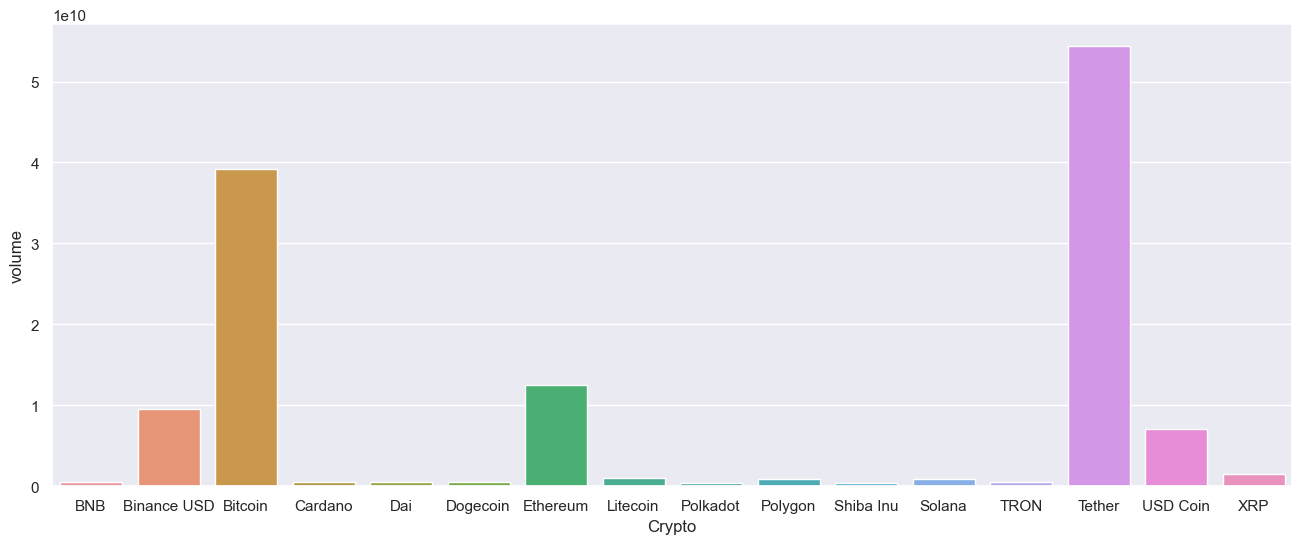

In [196]:
import matplotlib
x_data = trade['Crypto']
y_data = trade['volume']
matplotlib.rcParams['figure.figsize'] = (16, 6)
sns.barplot(x_data,y_data)

#### comparison of trade using line chart

<AxesSubplot:xlabel='Crypto', ylabel='volume'>

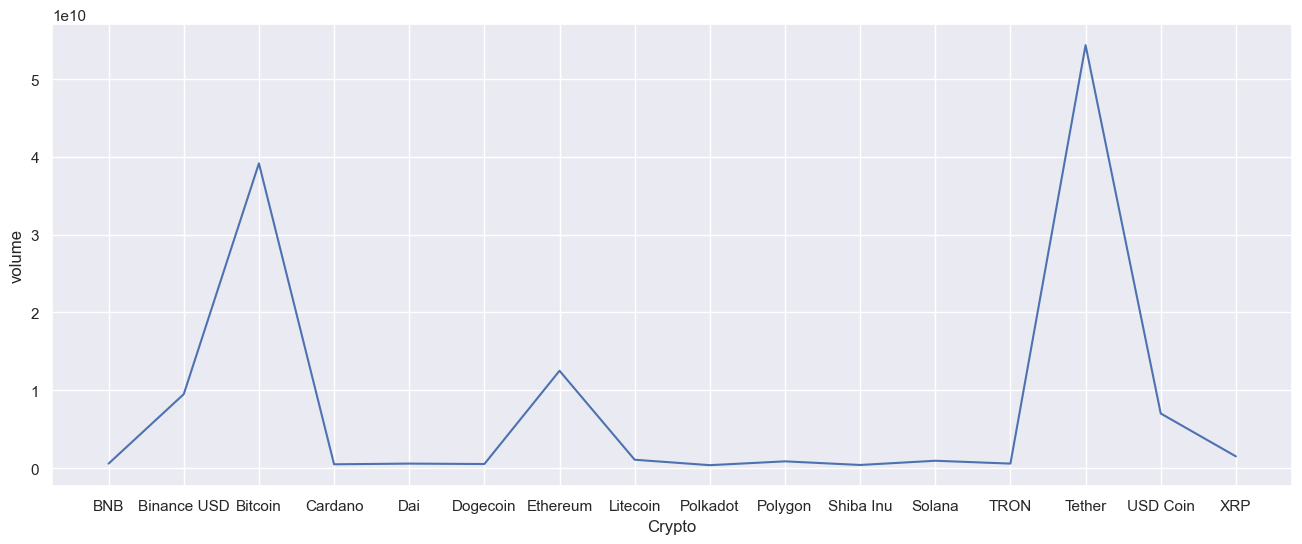

In [200]:
sns.lineplot(x='Crypto', y='volume', data=trade)

In [201]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10087,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19313625.0,19313625.0,...,41.6,421459093973.1,None,2023-03-10T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 21:59:40.971872
1,1027,Ethereum,ETH,ethereum,6565,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.2,122373866.2,...,18.7,173957736212.0,None,2023-03-10T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 21:59:40.971872
2,825,Tether,USDT,tether,49100,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71760806524.6,73141766321.2,...,7.7,73221196009.0,None,2023-03-10T21:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-10 21:59:40.971872
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157893106.4,159979963.6,...,4.7,44309314014.7,None,2023-03-10T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 21:59:40.971872
4,3408,USD Coin,USDC,usd-coin,10529,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43351932258.0,43351932258.0,...,4.7,43365938269.9,None,2023-03-10T21:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-10 21:59:40.971872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,5426,Solana,SOL,solana,439,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,383077955.5,539312704.9,...,0.7,9793197787.2,None,2023-03-10T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 22:57:07.409216
11,6636,Polkadot,DOT,polkadot-new,479,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1172055626.0,1291379489.4,...,0.7,7165732986.8,None,2023-03-10T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-10 22:57:07.409216
12,5994,Shiba Inu,SHIB,shiba-inu,493,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,549063278876301.9,589735030408322.8,...,0.6,6040300821.0,None,2023-03-10T22:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-03-10 22:57:07.409216
13,4943,Dai,DAI,multi-collateral-dai,1955,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5245637299.6,5245637299.6,...,0.6,5245445269.2,None,2023-03-10T22:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-03-10 22:57:07.409216


### Observation:
- Tether trading was the maximum during the given time 
- Bitcoin was the second highest

## Comparing rise in the USD value of Tether in the given 5 different timestamps

In [202]:
Crypto_trends2 = df[['name','quote.USD.price','Timestamp']]
Crypto_trends2 = Crypto_trends2.query("name == 'Tether'")
Crypto_trends2

,name,quote.USD.price,Timestamp
2,Tether,1.0,2023-03-10 21:59:40.971872
2,Tether,1.0,2023-03-10 22:53:04.515891
2,Tether,1.0,2023-03-10 22:54:06.641907
2,Tether,1.0,2023-03-10 22:55:06.894269
2,Tether,1.0,2023-03-10 22:56:07.146899
2,Tether,1.0,2023-03-10 22:57:07.409216


In [203]:
#Crypto_trends2['Timestamp'] = pd.to_datetime(Crypto_trends2.Timestamp)
Crypto_trends2['Timestamp'] = Crypto_trends2['Timestamp'].dt.strftime('%X')

In [204]:
Crypto_trends2

,name,quote.USD.price,Timestamp
2,Tether,1.0,21:59:40
2,Tether,1.0,22:53:04
2,Tether,1.0,22:54:06
2,Tether,1.0,22:55:06
2,Tether,1.0,22:56:07
2,Tether,1.0,22:57:07


In [205]:
Crypto_trends2.rename(columns={'name': 'Crypto', 'quote.USD.price': 'USD_price'}, inplace=True)
Crypto_trends2

,Crypto,USD_price,Timestamp
2,Tether,1.0,21:59:40
2,Tether,1.0,22:53:04
2,Tether,1.0,22:54:06
2,Tether,1.0,22:55:06
2,Tether,1.0,22:56:07
2,Tether,1.0,22:57:07


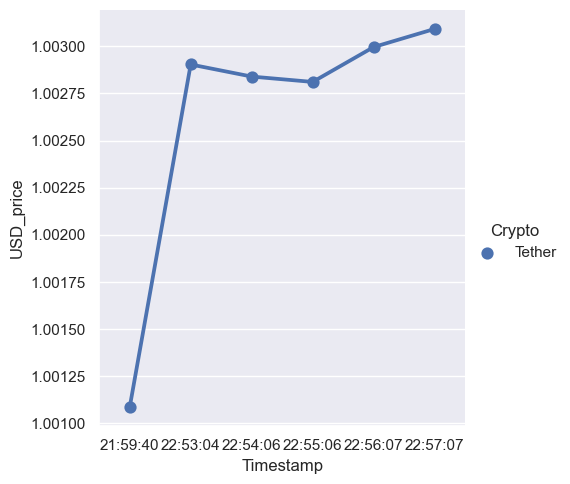

In [207]:

import matplotlib.pyplot as plt

sns.catplot(x='Timestamp', y='USD_price', hue='Crypto', data=Crypto_trends2, kind='point')


In [96]:
Crypto_trends = df.groupby('name')[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
Crypto_trends


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
BNB,0.3,0.2,-4.1,-15.6,1.4,-3.9
Binance USD,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
Bitcoin,0.7,-1.1,-9.9,-12.5,16.8,17.3
Cardano,1.3,2.9,-8.0,-20.3,-0.8,0.6
Dai,-0.0,0.1,0.0,-0.0,0.0,0.0
Dogecoin,0.7,0.3,-14.2,-27.3,-13.6,-32.2
Ethereum,0.6,-0.8,-9.0,-13.9,7.7,12.2
Litecoin,-0.1,-6.4,-20.4,-27.8,-12.2,-6.6
Polkadot,1.2,3.6,-7.9,-17.9,12.9,5.0


## Trend of the coin over different times

In [209]:
Crypto_trends.shape

(16, 6)

In [210]:
Crypto_trends2 = Crypto_trends.stack()
Crypto_trends2

name                              
BNB   quote.USD.percent_change_1h      0.3
      quote.USD.percent_change_24h     0.2
      quote.USD.percent_change_7d     -4.1
      quote.USD.percent_change_30d   -15.6
      quote.USD.percent_change_60d     1.4
                                      ... 
XRP   quote.USD.percent_change_24h    -0.6
      quote.USD.percent_change_7d     -1.0
      quote.USD.percent_change_30d    -7.1
      quote.USD.percent_change_60d     6.1
      quote.USD.percent_change_90d    -4.1
Length: 96, dtype: float64

In [211]:
Crypto_trends_pivot = Crypto_trends2.to_frame(name='values')
Crypto_trends_pivot

values
name                                     
BNB  quote.USD.percent_change_1h      0.3
     quote.USD.percent_change_24h     0.2
     quote.USD.percent_change_7d     -4.1
     quote.USD.percent_change_30d   -15.6
     quote.USD.percent_change_60d     1.4
...                                   ...
XRP  quote.USD.percent_change_24h    -0.6
     quote.USD.percent_change_7d     -1.0
     quote.USD.percent_change_30d    -7.1
     quote.USD.percent_change_60d     6.1
     quote.USD.percent_change_90d    -4.1

[96 rows x 1 columns]

In [213]:
index = pd.Index(range(120))
Crypto_trends_pivot = Crypto_trends_pivot.reset_index().rename(columns={'name':'Crypto_name','level_1': 'percent_change'})
Crypto_trends_pivot

,Crypto_name,percent_change,values
0,BNB,quote.USD.percent_change_1h,0.3
1,BNB,quote.USD.percent_change_24h,0.2
2,BNB,quote.USD.percent_change_7d,-4.1
3,BNB,quote.USD.percent_change_30d,-15.6
4,BNB,quote.USD.percent_change_60d,1.4
...,...,...,...
91,XRP,quote.USD.percent_change_24h,-0.6
92,XRP,quote.USD.percent_change_7d,-1.0
93,XRP,quote.USD.percent_change_30d,-7.1
94,XRP,quote.USD.percent_change_60d,6.1


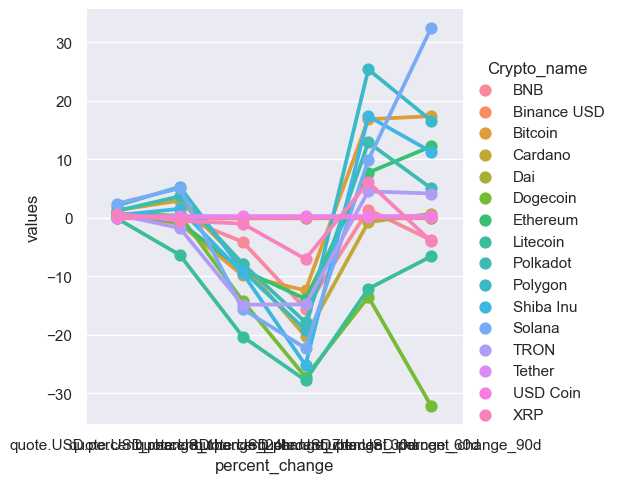

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='Crypto_name', data=Crypto_trends_pivot, kind='point')

## Split into test and train

In [32]:
X = Crypto_trends.iloc[:, :-1].values  
y = Crypto_trends.iloc[:, 1].values 

In [34]:
print(y)

[-2.82289859e+00 -3.16794849e+00 -7.29820000e-03 -5.48651772e+00
 -8.48484790e-01 -2.88173647e+00  1.60519500e-01 -7.48966994e+00
 -6.57020882e+00 -1.32872860e+01 -2.40697539e+00 -1.46874217e+00
 -5.28353213e+00 -1.34359723e+00 -1.32182293e+01  1.75249300e-02
  8.41225870e-01  2.68758500e-02 -6.52493492e+00 -5.37656777e+00]


In [25]:
#  Split the data into training/testing sets
X = Crypto_trends_pivot.iloc[:, :-1].values  
y = Crypto_trends_pivot.iloc[:, 1].values 

In [26]:
print(y)

['Avalanche' 'Avalanche' 'Avalanche' 'Avalanche' 'Avalanche' 'Avalanche'
 'BNB' 'BNB' 'BNB' 'BNB' 'BNB' 'BNB' 'Binance USD' 'Binance USD'
 'Binance USD' 'Binance USD' 'Binance USD' 'Binance USD' 'Bitcoin'
 'Bitcoin' 'Bitcoin' 'Bitcoin' 'Bitcoin' 'Bitcoin' 'Cardano' 'Cardano'
 'Cardano' 'Cardano' 'Cardano' 'Cardano' 'Chainlink' 'Chainlink'
 'Chainlink' 'Chainlink' 'Chainlink' 'Chainlink' 'Dai' 'Dai' 'Dai' 'Dai'
 'Dai' 'Dai' 'Dogecoin' 'Dogecoin' 'Dogecoin' 'Dogecoin' 'Dogecoin'
 'Dogecoin' 'Ethereum' 'Ethereum' 'Ethereum' 'Ethereum' 'Ethereum'
 'Ethereum' 'Litecoin' 'Litecoin' 'Litecoin' 'Litecoin' 'Litecoin'
 'Litecoin' 'Polkadot' 'Polkadot' 'Polkadot' 'Polkadot' 'Polkadot'
 'Polkadot' 'Polygon' 'Polygon' 'Polygon' 'Polygon' 'Polygon' 'Polygon'
 'Shiba Inu' 'Shiba Inu' 'Shiba Inu' 'Shiba Inu' 'Shiba Inu' 'Shiba Inu'
 'Solana' 'Solana' 'Solana' 'Solana' 'Solana' 'Solana' 'TRON' 'TRON'
 'TRON' 'TRON' 'TRON' 'TRON' 'Tether' 'Tether' 'Tether' 'Tether' 'Tether'
 'Tether' 'UNUS SED LEO' 'UNU

In [27]:
print(X)

[[0 'Avalanche' 'quote.USD.percent_change_1h']
 [1 'Avalanche' 'quote.USD.percent_change_24h']
 [2 'Avalanche' 'quote.USD.percent_change_7d']
 [3 'Avalanche' 'quote.USD.percent_change_30d']
 [4 'Avalanche' 'quote.USD.percent_change_60d']
 [5 'Avalanche' 'quote.USD.percent_change_90d']
 [6 'BNB' 'quote.USD.percent_change_1h']
 [7 'BNB' 'quote.USD.percent_change_24h']
 [8 'BNB' 'quote.USD.percent_change_7d']
 [9 'BNB' 'quote.USD.percent_change_30d']
 [10 'BNB' 'quote.USD.percent_change_60d']
 [11 'BNB' 'quote.USD.percent_change_90d']
 [12 'Binance USD' 'quote.USD.percent_change_1h']
 [13 'Binance USD' 'quote.USD.percent_change_24h']
 [14 'Binance USD' 'quote.USD.percent_change_7d']
 [15 'Binance USD' 'quote.USD.percent_change_30d']
 [16 'Binance USD' 'quote.USD.percent_change_60d']
 [17 'Binance USD' 'quote.USD.percent_change_90d']
 [18 'Bitcoin' 'quote.USD.percent_change_1h']
 [19 'Bitcoin' 'quote.USD.percent_change_24h']
 [20 'Bitcoin' 'quote.USD.percent_change_7d']
 [21 'Bitcoin' 'quo